This notebook plots summary plots for some stats on the footprint following the depth+ebv cuts.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import pickle

In [2]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

In [3]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'kraken_2036', 'colossus_2665', \
          'colossus_2664', 'colossus_2667', 'pontus_2002', 'pontus_2489', 'pontus_2502', 'mothra_2045', \
       'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097', 
      'cadence_roll_75_mix_rolling_mix_10yrs', 'roll_mix_100_rolling_mix_10yrs', \
            'roll_mix_rolling_mix_10yrs', \
            'rolling_10yrs', 'tms_roll_10yrs', 'alt_sched', 'alt_sched_rolling']
# output directory
outDir = '/global/homes/a/awan/desc/depth_data_outputs/comparisons'

# set up for plots
colors = ['m', 'b', 'g', 'k']
shapes = ['o', 'v', 's', 'd']

In [4]:
dicts = {}
data_dir = '/global/homes/a/awan/desc/depth_data_outputs'
for dbname in dbs:
    files = [f for f in os.listdir(data_dir) if f.__contains__(dbname) and f.endswith('pickle')]
    # need to separate alt_sched from alt_sched_rolling
    if dbname=='alt_sched':
        files = [f for f in files if not f.__contains__('rolling')]
    if len(files)>1:
        raise ValueError('Have more than one files: %s'%files)
    # consider the files
    for filename in files:
        print('Read in data for %s'%dbname)
        with open('%s/%s'%(data_dir, filename), 'rb') as handle:
            dicts[dbname] = pickle.load(handle)
            
nDbs = len(dicts.keys())
print('%s dbs'%nDbs)

Read in data for baseline2018a
Read in data for kraken_2026
Read in data for kraken_2035
Read in data for kraken_2036
Read in data for colossus_2665
Read in data for colossus_2664
Read in data for colossus_2667
Read in data for pontus_2002
Read in data for pontus_2489
Read in data for pontus_2502
Read in data for mothra_2045
Read in data for kraken_2042
Read in data for kraken_2044
Read in data for mothra_2049
Read in data for nexus_2097
Read in data for cadence_roll_75_mix_rolling_mix_10yrs
Read in data for roll_mix_100_rolling_mix_10yrs
Read in data for roll_mix_rolling_mix_10yrs
Read in data for rolling_10yrs
Read in data for tms_roll_10yrs
Read in data for alt_sched
Read in data for alt_sched_rolling
22 dbs


**Plot the usable area for different cadences**

Saved compare_area_22dbs.png


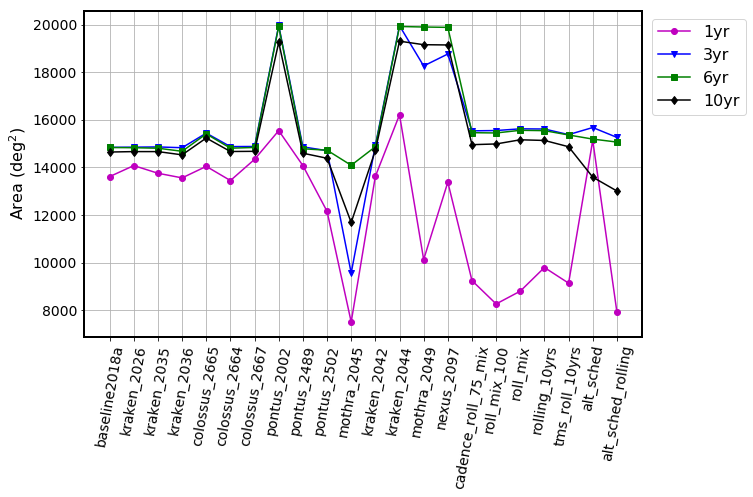

In [5]:
xlabels = []
# first need to create the lists with the data each yr_cut
areas = {}
for dbname in dicts:  # loop over dbs
    if dbname.__contains__('_rolling_mix_10yrs'):
        label = dbname.split('_rolling_mix_10yrs')[0]
    else:
        label = dbname
    xlabels.append(label)
    for yr_cut in dicts[dbname]['Area (deg$^2$)'].keys():  # loop over yr cuts
        if yr_cut not in areas: areas[yr_cut] = []
        # add this db's area
        areas[yr_cut].append(dicts[dbname]['Area (deg$^2$)'][yr_cut])

# now plot
for i, yr_cut in enumerate(areas):
    plt.plot(range(nDbs), areas[yr_cut], '%s-'%shapes[i], color=colors[i], label=yr_cut) 

# plot details
plt.grid()
plt.legend(bbox_to_anchor=(1.2,1))
plt.ylabel(r'Area (deg$^2$)')
plt.xticks(range(nDbs), xlabels, rotation=80)
filename = 'compare_area_%sdbs.png'%(nDbs)
plt.savefig('%s/%s'%(outDir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)
plt.show()

**Plot the i-band median depth + std for different cadences**

5$\sigma$ Depth: Median
Saved compare_depth_median_22dbs.png


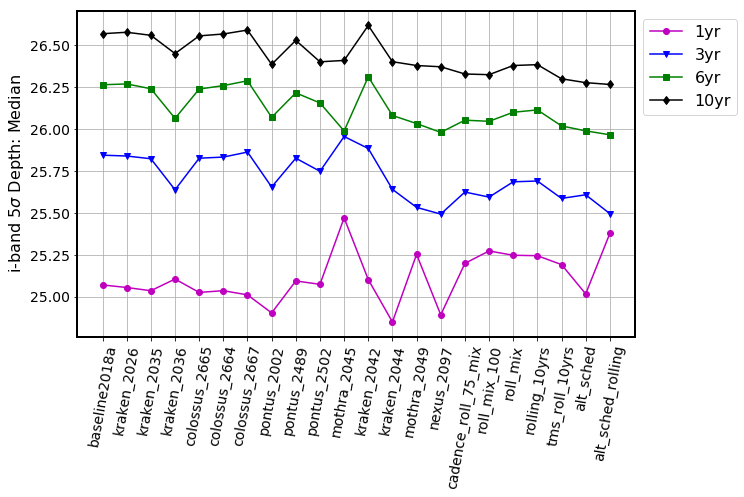

5$\sigma$ Depth: Std
Saved compare_depth_std_22dbs.png


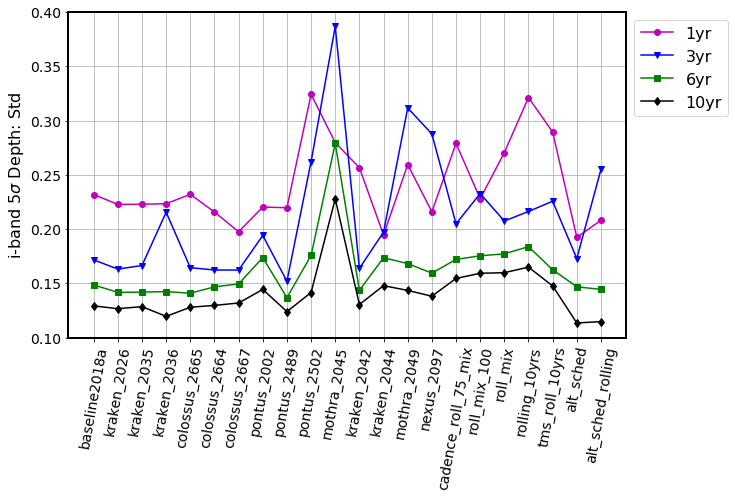

In [6]:
depths = {}
for band in ['i']:
    for stat in ['median', 'std']:
        depth_stat = {}
        stat_key = [f for f in dicts[dbname].keys() if f.__contains__(stat.capitalize())][0]
        print(stat_key)
        for dbname in dicts: # loop over dbs
            for yr_cut in areas: # loop over yr_cuts
                if yr_cut not in depth_stat: depth_stat[yr_cut] = []
                # add this db's depth
                depth_stat[yr_cut].append(dicts[dbname][stat_key]['%s_%s'%(yr_cut, band)])
        # add vertical markers
        for i, yr_cut in enumerate(areas):
            plt.plot(range(nDbs), depth_stat[yr_cut], '%s-'%shapes[i], color=colors[i], label=yr_cut)
        # plot details
        plt.grid()
        plt.legend(bbox_to_anchor=(1.,1))
        
        plt.ylabel(r'%s-band 5$\sigma$ Depth: %s'%(band, stat.capitalize()))
        plt.xticks(range(nDbs), xlabels, rotation=80)
        filename = 'compare_depth_%s_%sdbs.png'%(stat, nDbs)
        plt.savefig('%s/%s'%(outDir, filename), format= 'png', bbox_inches='tight')
        print('Saved %s'%filename)
        plt.show()
        
        if stat=='median': # save the median for the summary table plot
            depths = depth_stat

**Print out the markdown entries for the summary table; too much data to add one by one**

In [7]:
cuts = {'1yr': 'i>24.5 ; EBV<0.2', '3yr': 'i>25.0 ; EBV<0.2', '6yr': 'i>25.5 ; EBV<0.2', '10yr': 'i>26.0 ; EBV<0.2'}
for yr_cut in areas:
    print(yr_cut)
    for i, db in enumerate(dbs):
        if db.__contains__('_rolling_mix_10yrs'):
            db = db.split('_rolling_mix_10yrs')[0]
        else:
            db = db
        print('| %s | %s | %.2f | %.2f '%(db, cuts[yr_cut], areas[yr_cut][i], depths[yr_cut][i]))
    print('')

1yr
| baseline2018a | i>24.5 ; EBV<0.2 | 13612.92 | 25.07 
| kraken_2026 | i>24.5 ; EBV<0.2 | 14075.69 | 25.06 
| kraken_2035 | i>24.5 ; EBV<0.2 | 13753.66 | 25.04 
| kraken_2036 | i>24.5 ; EBV<0.2 | 13558.63 | 25.11 
| colossus_2665 | i>24.5 ; EBV<0.2 | 14043.17 | 25.03 
| colossus_2664 | i>24.5 ; EBV<0.2 | 13446.95 | 25.04 
| colossus_2667 | i>24.5 ; EBV<0.2 | 14338.07 | 25.01 
| pontus_2002 | i>24.5 ; EBV<0.2 | 15544.35 | 24.90 
| pontus_2489 | i>24.5 ; EBV<0.2 | 14074.95 | 25.10 
| pontus_2502 | i>24.5 ; EBV<0.2 | 12154.34 | 25.08 
| mothra_2045 | i>24.5 ; EBV<0.2 | 7504.49 | 25.47 
| kraken_2042 | i>24.5 ; EBV<0.2 | 13621.37 | 25.10 
| kraken_2044 | i>24.5 ; EBV<0.2 | 16210.07 | 24.85 
| mothra_2049 | i>24.5 ; EBV<0.2 | 10129.80 | 25.25 
| nexus_2097 | i>24.5 ; EBV<0.2 | 13376.87 | 24.89 
| cadence_roll_75_mix | i>24.5 ; EBV<0.2 | 9243.40 | 25.20 
| roll_mix_100 | i>24.5 ; EBV<0.2 | 8262.11 | 25.27 
| roll_mix | i>24.5 ; EBV<0.2 | 8800.47 | 25.25 
| rolling_10yrs | i>24.5 ; EBV<0.